In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


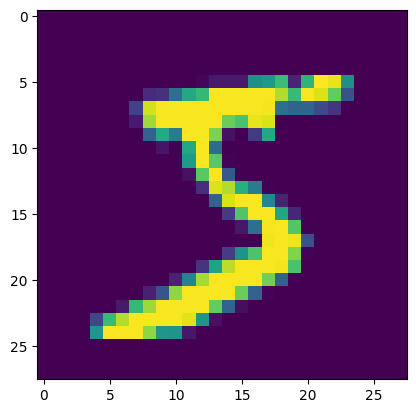

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[0])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = Sequential()

encoder.add(Flatten(input_shape=(28, 28)))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(learning_rate=1.5),
                    metrics=['accuracy'])

autoencoder.fit(X_train, X_train, epochs=5, validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.0745 - loss: 0.2972 - val_accuracy: 0.1130 - val_loss: 0.2114
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.1466 - loss: 0.1943 - val_accuracy: 0.1856 - val_loss: 0.1688
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.1931 - loss: 0.1623 - val_accuracy: 0.2005 - val_loss: 0.1548
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.2097 - loss: 0.1515 - val_accuracy: 0.2270 - val_loss: 0.1445
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.2254 - loss: 0.1396 - val_accuracy: 0.2252 - val_loss: 0.1340


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


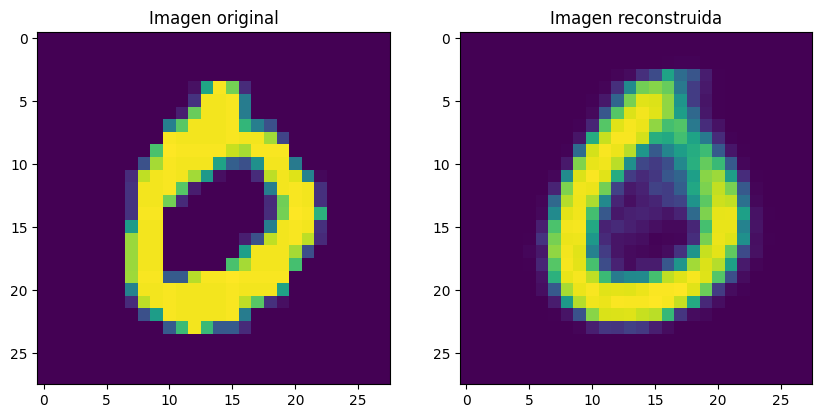

In [ ]:
predicciones = autoencoder.predict(X_test[:10])

n=3

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(X_test[n])
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(predicciones[n])
plt.title('Imagen reconstruida')

plt.show()

Denoising

In [ ]:
from tensorflow.keras.layers import GaussianNoise

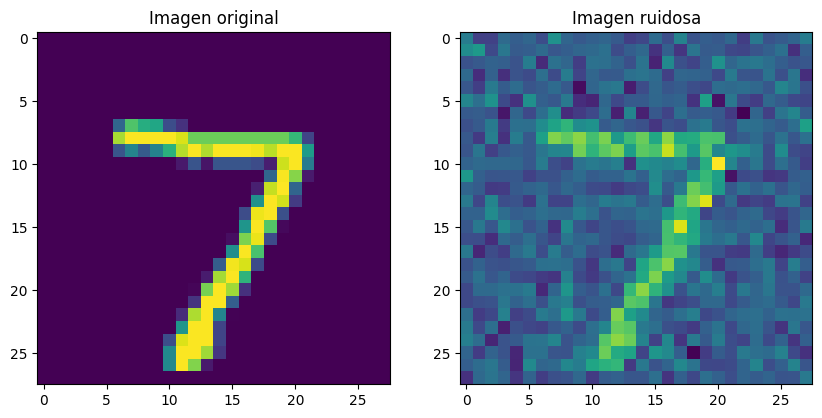

In [ ]:
sample = GaussianNoise(stddev=0.2)

noise = sample(X_test[:10], training=True)

n=0

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(X_test[n])
plt.title('Imagen original')

plt.subplot(1,2,2)
plt.imshow(noise[n])
plt.title('Imagen ruidosa')

plt.show()

In [ ]:
import tensorflow as tf

tf.random.set_seed(101)
encoder = Sequential()

encoder.add(Flatten(input_shape=(28, 28)))
encoder.add(GaussianNoise(stddev=0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))


decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
noise_removal = Sequential([encoder, decoder])

noise_removal.compile(loss='binary_crossentropy',
                    optimizer=SGD(learning_rate=1.5),
                    metrics=['accuracy'])

noise_removal.fit(X_train, X_train, epochs=5, validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.0725 - loss: 0.2920 - val_accuracy: 0.1179 - val_loss: 0.2214
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.1323 - loss: 0.2128 - val_accuracy: 0.1757 - val_loss: 0.1804
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1767 - loss: 0.1775 - val_accuracy: 0.1906 - val_loss: 0.1691
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.1969 - loss: 0.1612 - val_accuracy: 0.2108 - val_loss: 0.1513
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.2098 - loss: 0.1503 - val_accuracy: 0.2158 - val_loss: 0.1451


In [ ]:
noisy_images = sample(X_test[:10], training=True)

predicciones = noise_removal.predict(noisy_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


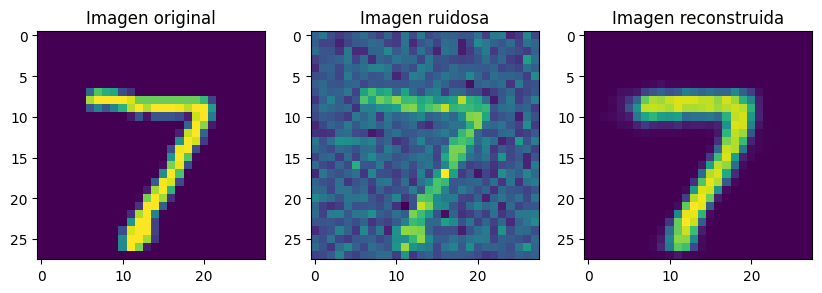

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(X_test[n])
plt.title('Imagen original')

plt.subplot(1,3,2)
plt.imshow(noisy_images[n])
plt.title('Imagen ruidosa')

plt.subplot(1,3,3)
plt.imshow(predicciones[n])
plt.title('Imagen reconstruida')

plt.show()